In [6]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/boston_housing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.shape

(506, 14)

# Finding Outliers

<Axes: >

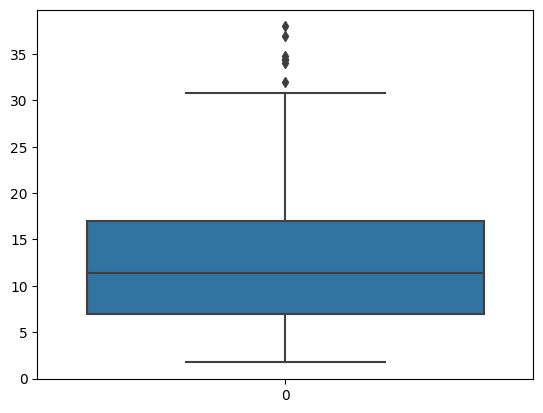

In [7]:
#Visualizing outliers using Boxplot
sns.boxplot(df['LSTAT'])

In [8]:
# position of the outlier
np.where(df['LSTAT'] > 31)

(array([141, 373, 374, 387, 412, 414, 438], dtype=int64),)

In [12]:
# Using Z Score to find outliers
mean = df['LSTAT'].mean()
std = df['LSTAT'].std()

outliers = []
for stat in df['LSTAT']:
    z = (stat-mean)/std
    if z > 3:
        outliers.append(stat)

print(outliers)


[34.41, 34.77, 37.97, 34.37, 36.98]


In [14]:
print(np.where(df['LSTAT'] > 34))

(array([141, 373, 374, 412, 414, 438], dtype=int64),)


In [17]:
# Using IQR
df1 = np.sort(df['LSTAT'])

q1 = np.percentile(df1, 25)
q3 = np.percentile(df1, 75)

IQR = q3 - q1
print('IQR ', IQR)

# find lower and upper bound
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)
print(lower_bound , '', upper_bound)

outliers = []
for s in df['LSTAT']:
    if (s<lower_bound) or (s>upper_bound):
        outliers.append(s)

print(outliers)


IQR  10.005000000000003
-8.057500000000005  31.962500000000006
[34.41, 34.77, 37.97, 31.99, 34.37, 36.98, 34.02]


In [19]:
outliers_array = np.where(df['LSTAT'] >= 31.99)
print(outliers_array)

(array([141, 373, 374, 387, 412, 414, 438], dtype=int64),)


In [24]:
df.drop(index = outliers_array[0], inplace=True)

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
df.shape

(499, 14)

In [29]:
# Now checking again if there r any outliers
df1 = np.sort(df['LSTAT'])

q1 = np.percentile(df1, 25)
q3 = np.percentile(df1, 75)

IQR = q3 - q1
print('IQR ', IQR)

# find lower and upper bound
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)
print(lower_bound , '', upper_bound)

outliers = []
for s in df['LSTAT']:
    if (s<lower_bound) or (s>upper_bound):
        outliers.append(s)

print(outliers)

IQR  9.64
-7.550000000000001  31.01
[]


In [30]:
# Clearly we have removed all the outliers

<Axes: >

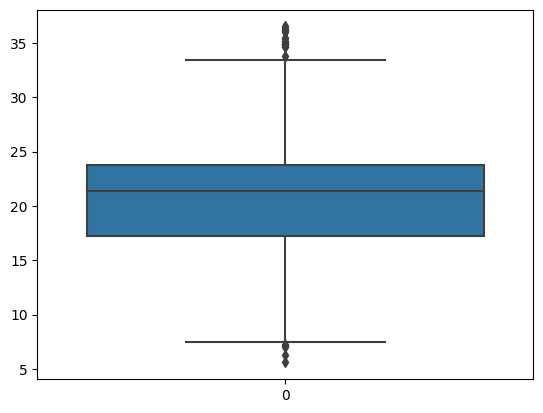

In [39]:
# Replacing outliers instead of dropping them :

sns.boxplot(df['MEDV'])


In [38]:
# calculate the median
median = df['MEDV'].median()

# replace outliers with median
df1 = np.sort(df['MEDV'])

q1 = np.percentile(df1, 25)
q3 = np.percentile(df1, 75)

IQR = q3 - q1
print('IQR ', IQR)

# find lower and upper bound
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)
print(lower_bound , '', upper_bound)

outliers = []
for s in df['MEDV']:
    if (s<lower_bound) or (s>upper_bound):
        outliers.append(s)

print(outliers)


IQR  6.550000000000001
7.424999999999999  33.625
[34.7, 36.2, 34.9, 35.4, 36.2, 34.9, 36.4, 34.6, 34.9, 36.0, 33.8, 36.5, 35.2, 35.1, 35.4, 36.1, 7.2, 6.3, 5.6, 7.2, 7.2, 7.0]


In [36]:
df['MEDV'] = np.where(df['MEDV'].isin(outliers), median, df['MEDV'])

In [37]:
df1 = np.sort(df['MEDV'])

q1 = np.percentile(df1, 25)
q3 = np.percentile(df1, 75)

IQR = q3 - q1
print('IQR ', IQR)

# find lower and upper bound
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)
print(lower_bound , '', upper_bound)

outliers = []
for s in df['MEDV']:
    if (s<lower_bound) or (s>upper_bound):
        outliers.append(s)

print(outliers)

IQR  6.550000000000001
7.424999999999999  33.625
[34.7, 36.2, 34.9, 35.4, 36.2, 34.9, 36.4, 34.6, 34.9, 36.0, 33.8, 36.5, 35.2, 35.1, 35.4, 36.1, 7.2, 6.3, 5.6, 7.2, 7.2, 7.0]
